In [1]:
from utils import import_qchem
from utils import utils
import math
import numpy as np
from scipy.optimize import curve_fit
from core.polymer_chain import Polymer
import json

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

## Import Qchem files for dihedral potential

In [3]:
n_energy, n_dihedral, n_errors = import_qchem.get_energy_dihedral('../pt_cust_dft_full')

# Fit polymer dihedral potential

### Ryckaert Bellemans dihedral function

$$V(\phi) = \sum_{n=0}^{5} c_n \cos^n(\phi)$$

In [4]:
n_rel_eV_energy = utils.relative_energy(n_energy)
n_params, n_covar = curve_fit(utils.RB_potential, n_dihedral, n_rel_eV_energy)

In [5]:
# create list of angles and corresponding energies
n_angles = np.linspace(-179.9, 180, 3600)
n_RB_energy = [utils.RB_potential(angle, *n_params) for angle in n_angles]

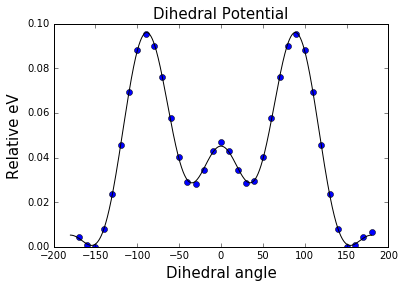

In [6]:
plt.figure()
plt.plot(n_dihedral, n_rel_eV_energy, 'o', n_angles, n_RB_energy, 'black')
plt.xlabel('Dihedral angle', fontsize=15)
plt.ylabel('Relative eV', fontsize=15)
plt.title('Dihedral Potential', fontsize=15)
plt.savefig('../data/general_dihedral_potential_large_text.png', bbox_inches='tight')
plt.show()

# Boltzmann distribution

$$p(\phi_i) = \frac{e^{\frac{-E_i(\phi_i)}{k_bT}}}{Z}$$

$$Z = \sum_{i=-\pi}^{\pi} e^{\frac{-E_i(\phi_i)}{k_bT}} $$

In [7]:
temp = 300.0

In [8]:
n_prob_300 = utils.boltz_dist(temp, n_RB_energy)

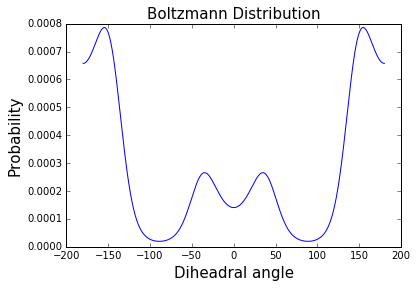

In [9]:
plt.figure()
plt.plot(n_angles, n_prob_300)
plt.xlabel('Diheadral angle', fontsize=15)
plt.ylabel('Probability', fontsize=15)
plt.title('Boltzmann Distribution', fontsize=15)
plt.savefig('../data/general_boltz_large_text.png', bbox_inches='tight')
plt.show()

# Cumulative probability

$$p_c(\phi_i) = \sum_{i}^{n}p(\phi_i)$$

In [10]:
n_cum_prob = [sum(n_prob_300[0:prob_i]) for prob_i in range(len(n_prob_300))]

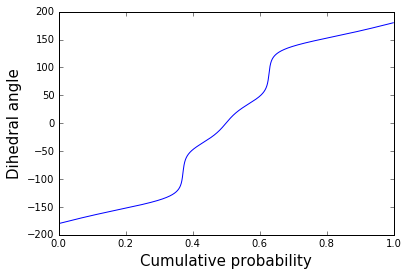

In [11]:
plt.figure()
plt.plot(n_cum_prob, n_angles)
plt.xlabel('Cumulative probability', fontsize=15)
plt.ylabel('Dihedral angle', fontsize=15)
plt.savefig('../data/cum_prob_white.png', bbox_inches='tight')
plt.show()

In [12]:
n_prob_angle = np.array(zip(n_cum_prob, n_angles))

# Define the chain

In [13]:
monomer_num = 50
monomer_len = 2.548
link_len = 1.480
link_angle = 15.0
sample_num = 100

# Sampling a single chain

In [14]:
test_polymer = Polymer(monomer_num, monomer_len, link_len, link_angle, n_prob_angle, sample_num)

In [15]:
#Check the linear chain

In [ ]:
plt.plot(n_cum_prob, n_angles)

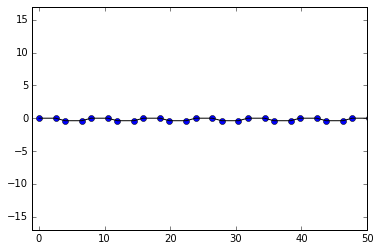

In [26]:
plt.plot(test_polymer.chain[:,0], test_polymer.chain[:,1], 'o', test_polymer.chain[:,0], test_polymer.chain[:,1], 'black')
plt.xlim(-1,50)
plt.ylim(-1.5,1.5)
plt.axes().set_aspect('equal', 'datalim')
plt.show()

# Rotate chain

In [18]:
test_polymer.rotate_chain()

In [ ]:
#Check the relaxed chain

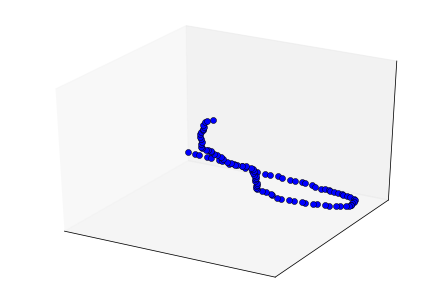

In [20]:
fig = plt.figure()
ax = Axes3D(fig)
#ax.set_axis_off()
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.plot(test_polymer.relax_chain[:,0], test_polymer.relax_chain[:,1], test_polymer.relax_chain[:,2], 'o')
fig.savefig('../data/chain_config_white.png', bbox_inches='tight')

# Sample over ensemble of chains

In [21]:
test_polymer.sample_chains()

# Chain properties

In [ ]:
# end-to-end distance .ete_stats
# correlation length .corr_stats

In [24]:
test_polymer.ete_stats.means

array([   0.        ,    2.548     ,    6.4930098 ,   10.33908367,
         14.13936214,   17.86263823,   21.51210801,   25.09820025,
         28.64202864,   32.11997217,   35.53437418,   38.86172521,
         42.119488  ,   45.32014107,   48.45183876,   51.56601034,
         54.66286321,   57.66743745,   60.51336125,   63.30979273,
         66.07260246,   68.85831251,   71.62866498,   74.40975145,
         77.09909872,   79.66111768,   82.16075803,   84.57840931,
         86.97115269,   89.48012818,   91.84996878,   94.25456195,
         96.60035119,   98.91177945,  101.2178202 ,  103.46293036,
        105.71721441,  107.8840003 ,  109.94821948,  111.92119718,
        113.89599889,  115.94469543,  117.91460266,  119.7890952 ,
        121.67136668,  123.52842621,  125.37024686,  127.2791451 ,
        129.16513998,  131.023815  ,  132.85506495])

In [25]:
test_polymer.ete_stats.stdevs

array([  0.        ,   0.        ,   0.05117098,   0.16402223,
         0.36057664,   0.61676018,   0.91525333,   1.20851998,
         1.47232972,   1.72976837,   2.06105969,   2.52543861,
         3.01032999,   3.51302655,   4.11655976,   4.71863187,
         5.29037734,   5.95746906,   6.63676855,   7.24692481,
         7.89854643,   8.50224612,   9.1894126 ,   9.80443493,
        10.46056536,  11.03849101,  11.69703978,  12.44130831,
        13.27534308,  13.90564743,  14.61724057,  15.35376104,
        15.99587892,  16.60226871,  17.29903452,  17.96660404,
        18.60172059,  19.36095654,  20.09780715,  20.88304105,
        21.7510686 ,  22.65787144,  23.51658013,  24.23352616,
        24.99439996,  25.94598817,  26.84589477,  27.7427479 ,
        28.6317373 ,  29.49677781,  30.36398   ])